In [1]:
import matplotlib

In [2]:
import numpy as np
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FormatStrFormatter
import imageio
import matplotlib.ticker as ticker
import pickle


import random
import scipy.special as sp
from matplotlib import cm
import seaborn as sns
import pandas as pd



Bad key text.latex.preview in file C:\Users\ek672\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\ek672\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\ek672\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95 

In [3]:
#need for colorbar
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [4]:

def quiver_geopot_plot(U,V,Phi,lambdas,mus,sparseness):
    
    X = lambdas*180/np.pi
    Y = np.arcsin(mus)*180/np.pi

    plt.contourf(X, Y, (Phi))
    
    bounds=[-100000,1.2*10**4,4.4*10**5,8.6*10**5,1.3*10**6,1.7*10**6,2.1*10**6,2.6*10**6,3.0*10**6,3.4*10**6,3.8*10**6]
    bounds=np.array(bounds)+4*10**6
    bounds2=np.interp(np.linspace(4*10**6-100000,4*10**6+3.8*10**6,len(bounds)*20),bounds,bounds)

    CS = plt.contourf(X, Y, (Phi), levels=bounds2, cmap=cm.nipy_spectral, extend='both')  
    colorbar = plt.colorbar(CS)
    
    Xsparse=X[0::sparseness]
    Ysparse=Y[0::sparseness]
  
    Usparse=U[0::sparseness,0::sparseness]
    Vsparse=V[0::sparseness,0::sparseness]


    plt.quiver(Xsparse,Ysparse,Usparse,Vsparse)

    plt.show()
    

In [5]:
def read_pickle_local(filename):
    infile = open(filename,'rb')
    var = pickle.load(infile)
    infile.close()
    return var

def read_pickle(filename):
    infile = open('averages/'+filename,'rb')
    var = pickle.load(infile)
    infile.close()
    return var

In [6]:
PhiA3Taurad0p1=read_pickle_local('Phi-a3-taurad0p1')
PhiA3Taurad1=read_pickle_local('Phi-a3-taurad1')
PhiA3Taurad10=read_pickle_local('Phi-a3-taurad10')

PhiPBSTaurad0p1=read_pickle_local('Phi-PBS-taurad0p1')
PhiPBSTaurad1=read_pickle_local('Phi-PBS-taurad1')
PhiPBSTaurad10=read_pickle_local('Phi-PBS-taurad10')

UA3Taurad0p1=read_pickle_local('U-a3-taurad0p1')
UA3Taurad1=read_pickle_local('U-a3-taurad1')
UA3Taurad10=read_pickle_local('U-a3-taurad10')

UPBSTaurad0p1=read_pickle_local('U-PBS-taurad0p1')
UPBSTaurad1=read_pickle_local('U-PBS-taurad1')
UPBSTaurad10=read_pickle_local('U-PBS-taurad10')

VA3Taurad0p1=read_pickle_local('V-a3-taurad0p1')
VA3Taurad1=read_pickle_local('V-a3-taurad1')
VA3Taurad10=read_pickle_local('V-a3-taurad10')

VPBSTaurad0p1=read_pickle_local('V-PBS-taurad0p1')
VPBSTaurad1=read_pickle_local('V-PBS-taurad1')
VPBSTaurad10=read_pickle_local('V-PBS-taurad10')

mus=read_pickle_local('mus')
lambdas=read_pickle_local('lambdas')

sparseness=4

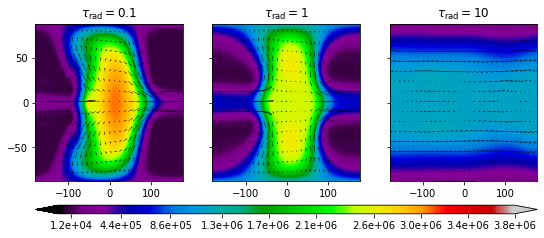

In [7]:


#fig, axs=plt.subplots(1,3,sharex=True,sharey=True, gridspec_kw=dict(height_ratios=[1, 1], width_ratios=[2, 2, 2]),figsize=(8,5))
fig, axs=plt.subplots(1,3,sharex=True,sharey=True, gridspec_kw=dict(width_ratios=[2, 2, 2]),figsize=(9,3))


X = lambdas*180/np.pi
Y = np.arcsin(mus)*180/np.pi

    
Xsparse=X[0::sparseness]
Ysparse=Y[0::sparseness]

bounds=[-100000,1.2*10**4,4.4*10**5,8.6*10**5,1.3*10**6,1.7*10**6,2.1*10**6,2.6*10**6,3.0*10**6,3.4*10**6,3.8*10**6]
bounds=np.array(bounds)+4*10**6
bounds2=np.interp(np.linspace(4*10**6-100000,4*10**6+3.8*10**6,len(bounds)*20),bounds,bounds)-4*10**6
CS = plt.contourf(X, Y, PhiPBSTaurad0p1, levels=bounds2, cmap=cm.nipy_spectral, extend='both')  
#fig.colorbar(location="bottom")
#colorbar = plt.colorbar(CS, orientation="horizontal")

#axs[0,0].contourf(X, Y, PhiPBSTaurad0p1+40*10**6,levels=bounds2, cmap=cm.nipy_spectral, extend='both')

UPhiPBSTaurad0p1sparse=UPBSTaurad0p1[0::sparseness,0::sparseness]
VPhiPBSTaurad0p1sparse=VPBSTaurad0p1[0::sparseness,0::sparseness]

aspectratio=1


axs[0].quiver(Xsparse,Ysparse,UPhiPBSTaurad0p1sparse,VPhiPBSTaurad0p1sparse)


cs=axs[0].contourf(X, Y, PhiPBSTaurad0p1, cmap=cm.nipy_spectral,levels=bounds2)
UPhiPBSTaurad0p1sparse=UPBSTaurad0p1[0::sparseness,0::sparseness]
VPhiPBSTaurad0p1sparse=VPBSTaurad0p1[0::sparseness,0::sparseness]
axs[0].quiver(Xsparse,Ysparse,UPhiPBSTaurad0p1sparse,VPhiPBSTaurad0p1sparse)
axs[0].set_title(r'$\tau_{\rm rad}=0.1$')
#axs[0].set_title(r'$p_{\rm out}$')


axs[1].contourf(X, Y, PhiPBSTaurad1, cmap=cm.nipy_spectral,levels=bounds2)
UPhiPBSTaurad1sparse=UPBSTaurad1[0::sparseness,0::sparseness]
VPhiPBSTaurad1sparse=VPBSTaurad1[0::sparseness,0::sparseness]
axs[1].quiver(Xsparse,Ysparse,UPhiPBSTaurad1sparse,VPhiPBSTaurad1sparse)
axs[1].set_title(r'$\tau_{\rm rad}=1$')


axs[2].contourf(X, Y, PhiPBSTaurad10, cmap=cm.nipy_spectral,levels=bounds2)
UPhiPBSTaurad10sparse=UPBSTaurad10[0::sparseness,0::sparseness]
VPhiPBSTaurad10sparse=VPBSTaurad10[0::sparseness,0::sparseness]
axs[2].quiver(Xsparse,Ysparse,UPhiPBSTaurad10sparse,VPhiPBSTaurad10sparse)
axs[2].set_title(r'$\tau_{\rm rad}=10$')

fig.subplots_adjust(bottom=.15)

plt.draw()
p0 = axs[0].get_position().get_points().flatten()
p1 = axs[1].get_position().get_points().flatten()
p2 = axs[2].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0, p2[2]-p0[0], 0.04])
cbar=fig.colorbar(CS, cax=ax_cbar, orientation='horizontal',ticks=[1.2*10**4,4.4*10**5,8.6*10**5,1.3*10**6,1.7*10**6,2.1*10**6,2.6*10**6,3.0*10**6,3.4*10**6,3.8*10**6])
#cbar = fig.colorbar(CS, [8.6*10**5,1.3*10**6,1.7*10**6,2.1*10**6,2.6*10**6])
cbar.ax.set_xticklabels(['1.2e+04','4.4e+05','8.6e+05','1.3e+06','1.7e+06','2.1e+06','2.6e+06','3.0e+06','3.4e+06','3.8e+06']) 


for c in axs[0].collections:
    c.set_edgecolor("face")
    
for c in axs[1].collections:
    c.set_edgecolor("face")

for c in axs[2].collections:
    c.set_edgecolor("face")

plt.show()
fig.savefig('PBS.pdf', dpi = 300,bbox_inches='tight')




#cbar_ax = fig.add_axes([0.95, 0.05, 0.05, 0.7])
#fig.colorbar(CS,ax=axs.ravel().tolist())





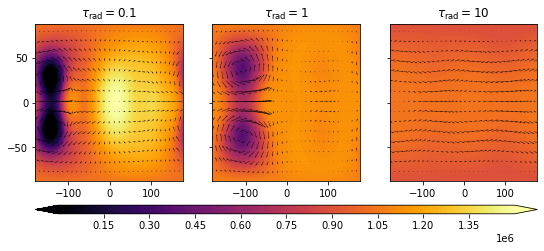

In [8]:
fig, axs=plt.subplots(1,3,sharex=True,sharey=True, gridspec_kw=dict(width_ratios=[2, 2, 2]),figsize=(9,3))

colorscheme=cm.inferno

X = lambdas*180/np.pi
Y = np.arcsin(mus)*180/np.pi

    
Xsparse=X[0::sparseness]
Ysparse=Y[0::sparseness]

bounds=[0,5*10**5,7.5*10**5,10**6,1.25*10**6,1.5*10**6]
bounds=np.array(bounds)
bounds2=np.interp(np.linspace(0,1.5*10**6,len(bounds)*20),bounds,bounds)
CS = plt.contourf(X, Y, PhiA3Taurad0p1, cmap=colorscheme, extend='both',levels=bounds2)  
#fig.colorbar(location="bottom")
#colorbar = plt.colorbar(CS, orientation="horizontal")

#axs[0,0].contourf(X, Y, PhiPBSTaurad0p1+40*10**6,levels=bounds2, cmap=cm.nipy_spectral, extend='both')

UPhiPBSTaurad0p1sparse=UPBSTaurad0p1[0::sparseness,0::sparseness]
VPhiPBSTaurad0p1sparse=VPBSTaurad0p1[0::sparseness,0::sparseness]

aspectratio=1


axs[0].contourf(X, Y, PhiA3Taurad0p1, cmap=colorscheme,extend='both',levels=bounds2)
UPhiA3Taurad0p1sparse=UA3Taurad0p1[0::sparseness,0::sparseness]
VPhiA3Taurad0p1sparse=VA3Taurad0p1[0::sparseness,0::sparseness]
axs[0].quiver(Xsparse,Ysparse,UPhiA3Taurad0p1sparse,VPhiA3Taurad0p1sparse)
axs[0].set_title(r'$\tau_{\rm rad}=0.1$')

axs[1].contourf(X, Y, PhiA3Taurad1, cmap=colorscheme,levels=bounds2)
UPhiA3Taurad1sparse=UA3Taurad1[0::sparseness,0::sparseness]
VPhiA3Taurad1sparse=VA3Taurad1[0::sparseness,0::sparseness]
axs[1].quiver(Xsparse,Ysparse,UPhiA3Taurad1sparse,VPhiA3Taurad1sparse)
axs[1].set_title(r'$\tau_{\rm rad}=1$')


axs[2].contourf(X, Y, PhiA3Taurad10, cmap=colorscheme,levels=bounds2)
UPhiA3Taurad10sparse=UA3Taurad10[0::sparseness,0::sparseness]
VPhiA3Taurad10sparse=VA3Taurad10[0::sparseness,0::sparseness]
axs[2].quiver(Xsparse,Ysparse,UPhiA3Taurad10sparse,VPhiA3Taurad10sparse)    
axs[2].set_title(r'$\tau_{\rm rad}=10$')

fig.subplots_adjust(bottom=.15)

plt.draw()
p0 = axs[0].get_position().get_points().flatten()
p1 = axs[1].get_position().get_points().flatten()
p2 = axs[2].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0, p2[2]-p0[0], 0.04])
tickarray=[1.5*10**5,3*10**5,4.5*10**5,6*10**5,7.5*10**5,9*10**5,1.05*10**6,1.2*10**6,1.35*10**6]
#cbar=fig.colorbar(CS, cax=ax_cbar, orientation='horizontal',format=ticker.FuncFormatter(fmt))
cbar=fig.colorbar(CS, cax=ax_cbar, orientation='horizontal',ticks=tickarray)
#cbar = fig.colorbar(CS, [1.5*10**5,3*10**5,4.5*10**6,6*10**5,7.5*10**5,9*10**5,1.05*10**6,1.2*10**6,1.35*10**6])
#cbar.ax.set_xticklabels(['1.2e+04','4.4e+05','8.6e+05','1.3e+06','1.7e+06','2.1e+06','2.6e+06','3.0e+06','3.4e+06','3.8e+06']) 


for c in axs[0].collections:
    c.set_edgecolor("face")
    
for c in axs[1].collections:
    c.set_edgecolor("face")

for c in axs[2].collections:
    c.set_edgecolor("face")

plt.show()
fig.savefig('SN.pdf', dpi = 300,bbox_inches='tight')

In [9]:
sample=read_pickle('high-Phibar4-P10-tau10-Phi')
[a,b]=np.shape(sample)

Phidata=np.zeros((9,a,b))
Udata=np.zeros((9,a,b))
Vdata=np.zeros((9,a,b))

Pvec=[1,5,10]
tauvec=['0p1',1,10]
for i in range(3):
    for j in range(3):
        Phifilename='high-Phibar4-P'+str(Pvec[j])+'-tau'+str(tauvec[i])+'-Phi'
        Phidata[i+3*j,:,:]=read_pickle(Phifilename)
        
        Ufilename='high-Phibar4-P'+str(Pvec[j])+'-tau'+str(tauvec[i])+'-U'
        Udata[i+3*j,:,:]=read_pickle(Ufilename)
        
        Vfilename='high-Phibar4-P'+str(Pvec[j])+'-tau'+str(tauvec[i])+'-V'
        Vdata[i+3*j,:,:]=read_pickle(Vfilename)



In [10]:
#need for colorbar
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)



In [11]:
def makeplotgrid(Phidata,Udata,Vdata,title):
    
    """
    Creates a 3x3 plot

    Parameters
    ----------
    :param Phidata: 
        array of size 9xJxI
    
    :param U: 
         array of size 9xJxI
    
    
    :param V: 
        array of size 9xJxI
    
    :param title:
        string
    -------
    :return fig: the figure

    """
    

    fig, axs=plt.subplots(3,3,sharex=True,sharey=True, constrained_layout=True, gridspec_kw=dict(width_ratios=[2, 2, 2]),figsize=(9,6))

    colorscheme=cm.inferno

    X = lambdas*180/np.pi
    Y = np.arcsin(mus)*180/np.pi


    Xsparse=X[0::sparseness]
    Ysparse=Y[0::sparseness]

    #bounds=[0,5*10**5,7.5*10**5,10**6,1.25*10**6,1.5*10**6]
    #bounds=np.array(bounds)
    #bounds2=np.interp(np.linspace(0,1.5*10**6,len(bounds)*20),bounds,bounds)
    bounds2=np.linspace(0,np.max(Phidata))
    CS = plt.contourf(X, Y, Phidata[0,:,:], cmap=colorscheme, extend='both',levels=bounds2)  
    #fig.colorbar(location="bottom")
    #colorbar = plt.colorbar(CS, orientation="horizontal")

    #axs[0,0].contourf(X, Y, PhiPBSTaurad0p1+40*10**6,levels=bounds2, cmap=cm.nipy_spectral, extend='both')

    aspectratio=1

    UP1tau0p1=Udata[0,:,:]
    VP1tau0p1=Vdata[0,:,:]
    axs[0,0].contourf(X, Y, Phidata[0,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP1tau0p1sparse=UP1tau0p1[0::sparseness,0::sparseness]
    VP1tau0p1sparse=VP1tau0p1[0::sparseness,0::sparseness]
    axs[0,0].quiver(Xsparse,Ysparse,UP1tau0p1sparse,VP1tau0p1sparse)
    axs[0,0].set_title(r'$0.1$')
    axs[0,0].set_ylabel(r'$1$')

    UP1tau1=Udata[1,:,:]
    VP1tau1=Vdata[1,:,:]
    axs[0,1].contourf(X, Y, Phidata[1,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP1tau1sparse=UP1tau1[0::sparseness,0::sparseness]
    VP1tau1sparse=VP1tau1[0::sparseness,0::sparseness]
    axs[0,1].quiver(Xsparse,Ysparse,UP1tau1sparse,VP1tau1sparse)
    axs[0,1].set_title(r'$1$')


    UP1tau10=Udata[2,:,:]
    VP1tau10=Vdata[2,:,:]
    axs[0,2].contourf(X, Y, Phidata[2,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP1tau10sparse=UP1tau10[0::sparseness,0::sparseness]
    VP1tau10sparse=VP1tau10[0::sparseness,0::sparseness]
    axs[0,2].quiver(Xsparse,Ysparse,UP1tau10sparse,VP1tau10sparse)
    axs[0,2].set_title(r'$10$')


    UP5tau0p1=Udata[3,:,:]
    VP5tau0p1=Vdata[3,:,:]
    axs[1,0].contourf(X, Y, Phidata[3,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP5tau0p1sparse=UP1tau0p1[0::sparseness,0::sparseness]
    VP5tau0p1sparse=VP1tau0p1[0::sparseness,0::sparseness]
    axs[1,0].quiver(Xsparse,Ysparse,UP5tau0p1sparse,VP5tau0p1sparse)
    axs[1,0].set_ylabel(r'$5$')


    UP5tau1=Udata[4,:,:]
    VP5tau1=Vdata[4,:,:]
    axs[1,1].contourf(X, Y, Phidata[4,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP5tau1sparse=UP5tau1[0::sparseness,0::sparseness]
    VP5tau1sparse=VP5tau1[0::sparseness,0::sparseness]
    axs[1,1].quiver(Xsparse,Ysparse,UP5tau1sparse,VP5tau1sparse)

    

    UP5tau10=Udata[5,:,:]
    VP5tau10=Vdata[5,:,:]
    axs[1,2].contourf(X, Y, Phidata[5,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP5tau10sparse=UP5tau10[0::sparseness,0::sparseness]
    VP5tau10sparse=VP5tau10[0::sparseness,0::sparseness]
    axs[1,2].quiver(Xsparse,Ysparse,UP5tau10sparse,VP5tau10sparse)

   
    UP10tau0p1=Udata[6,:,:]
    VP10tau0p1=Vdata[6,:,:]
    axs[2,0].contourf(X, Y, Phidata[6,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP10tau0p1sparse=UP10tau0p1[0::sparseness,0::sparseness]
    VP10tau0p1sparse=VP10tau0p1[0::sparseness,0::sparseness]
    axs[2,0].quiver(Xsparse,Ysparse,UP10tau0p1sparse,VP10tau0p1sparse)
    axs[2,0].set_ylabel(r'$10$')
    
    UP10tau1=Udata[7,:,:]
    VP10tau1=Vdata[7,:,:]
    axs[2,1].contourf(X, Y, Phidata[7,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP10tau1sparse=UP10tau1[0::sparseness,0::sparseness]
    VP10tau1sparse=VP10tau1[0::sparseness,0::sparseness]
    axs[2,1].quiver(Xsparse,Ysparse,UP10tau1sparse,VP10tau1sparse)


    UP10tau10=Udata[8,:,:]
    VP10tau10=Vdata[8,:,:]
    axs[2,2].contourf(X, Y, Phidata[8,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP10tau10sparse=UP10tau10[0::sparseness,0::sparseness]
    VP10tau10sparse=VP10tau10[0::sparseness,0::sparseness]
    axs[2,2].quiver(Xsparse,Ysparse,UP10tau10sparse,VP10tau10sparse)
   

    #prevents aliasing when saving to .pdf
    for c in axs[0,0].collections:
        c.set_edgecolor("face")
    for c in axs[0,1].collections:
        c.set_edgecolor("face")
    for c in axs[0,2].collections:
        c.set_edgecolor("face")
    for c in axs[1,0].collections:
        c.set_edgecolor("face")
    for c in axs[1,1].collections:
        c.set_edgecolor("face")
    for c in axs[1,2].collections:
        c.set_edgecolor("face")
    for c in axs[2,0].collections:
        c.set_edgecolor("face")
    for c in axs[2,1].collections:
        c.set_edgecolor("face")
    for c in axs[2,2].collections:
        c.set_edgecolor("face")

    ax_cbar=axs[:, 2]
    
    cbar=fig.colorbar(CS, ax=ax_cbar,format=ticker.FuncFormatter(fmt))
    fig.suptitle(title,y=1.1,fontsize=16) 
    fig.supylabel(r'$P_{\rm rot} \ \rm{[days]}$')
    fig.supxlabel(r'$\tau_{\rm rad} \ \rm{[days]}$',y=1)
    plt.show()
    return fig



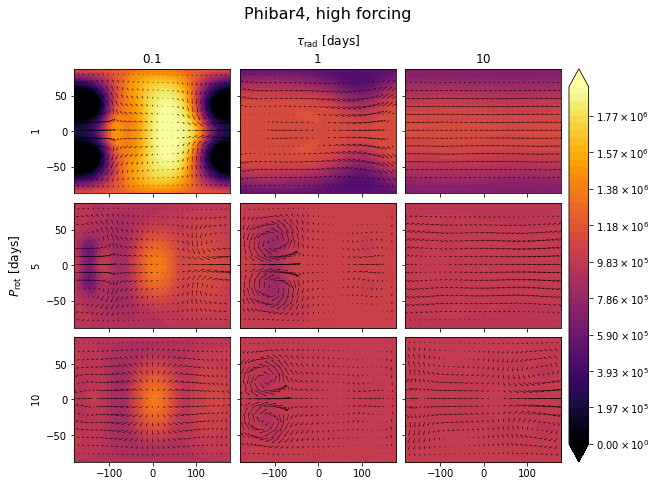

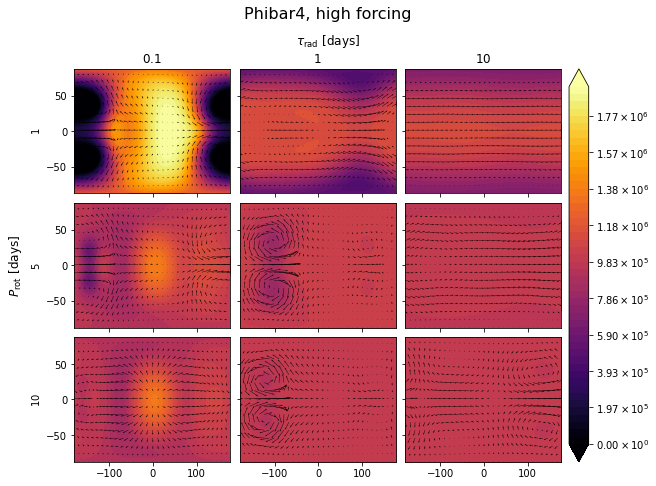

In [12]:
makeplotgrid(Phidata,Udata,Vdata,'Phibar4, high forcing')

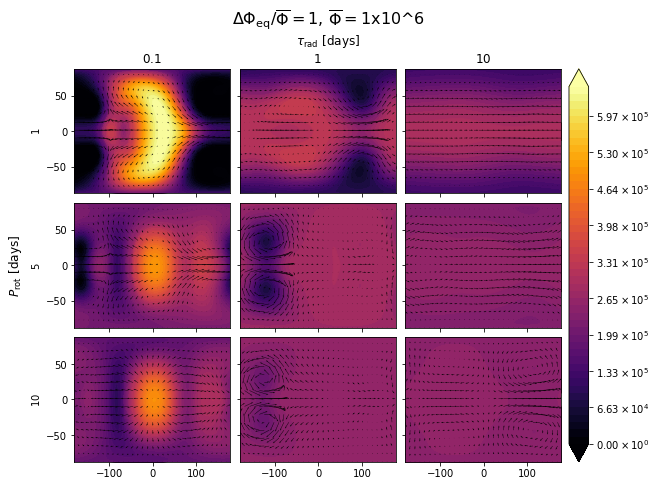

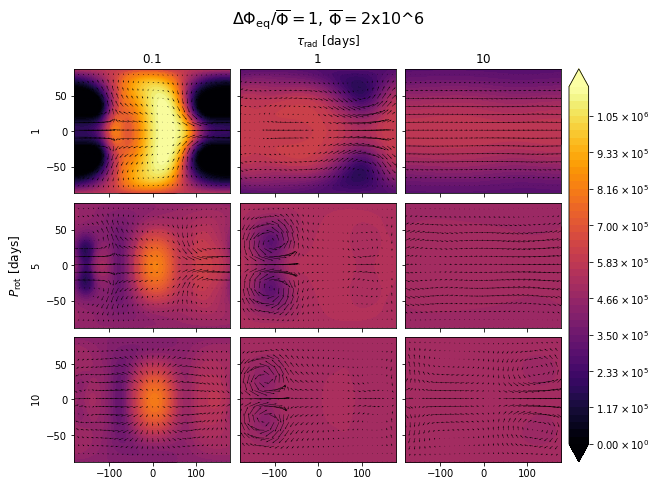

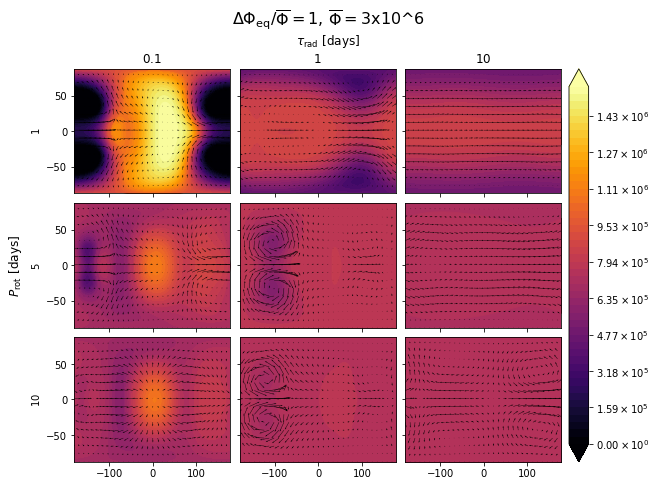

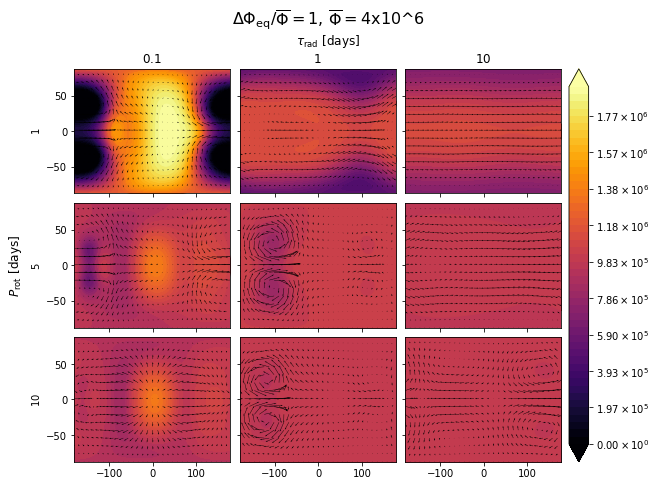

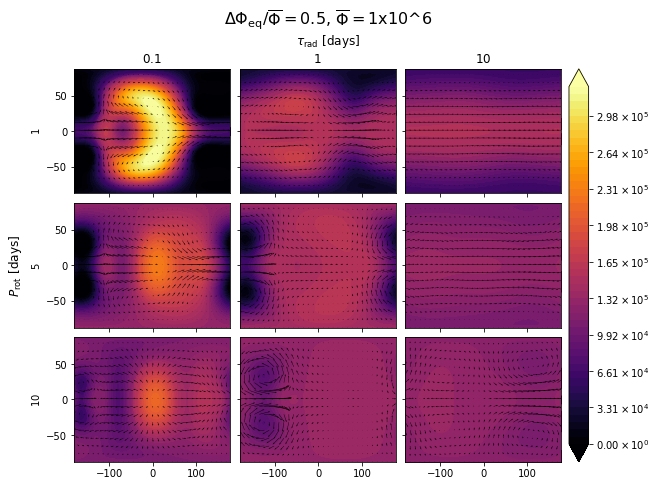

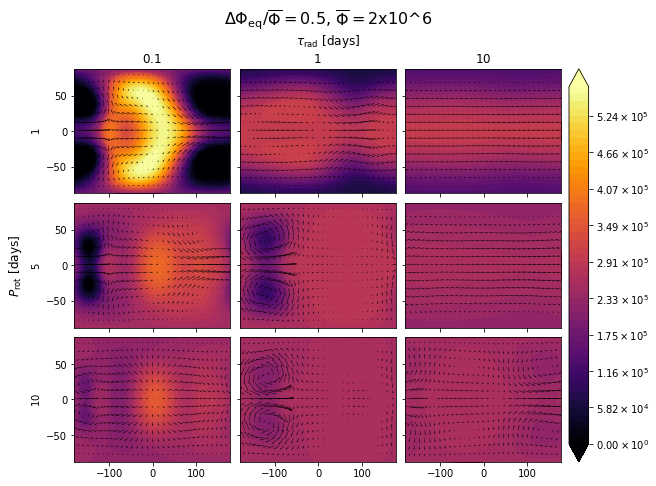

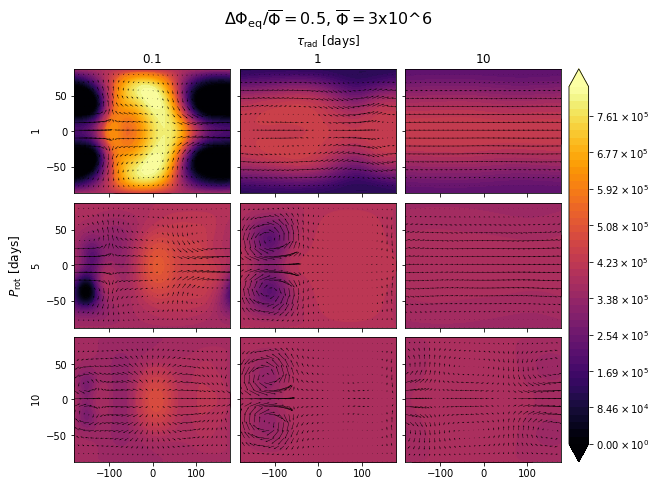

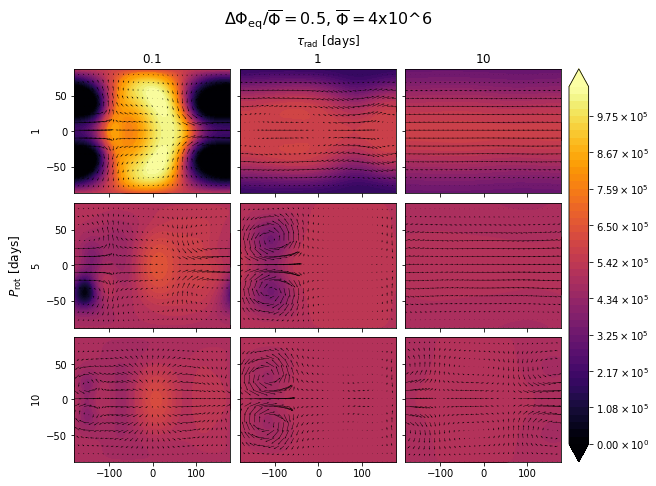

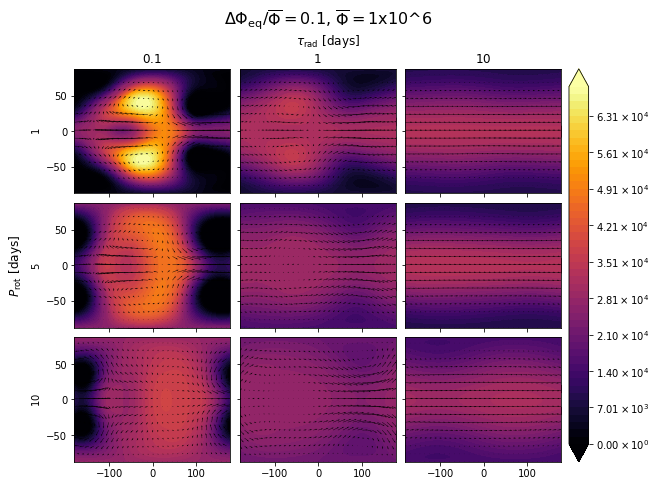

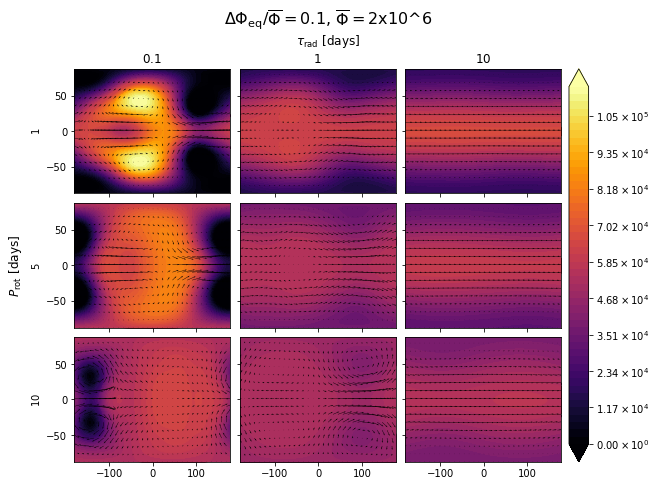

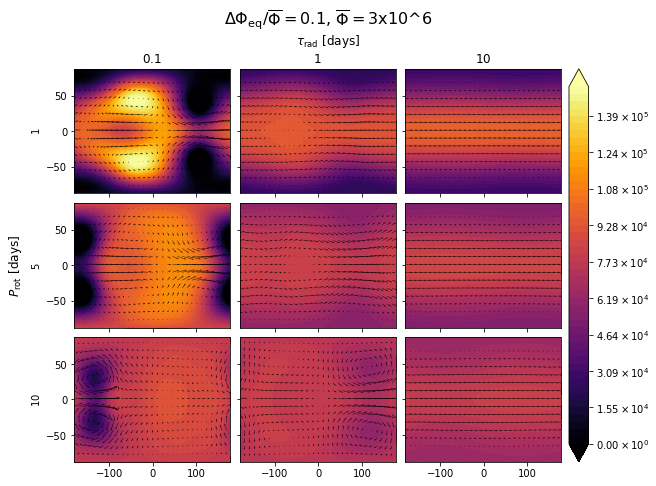

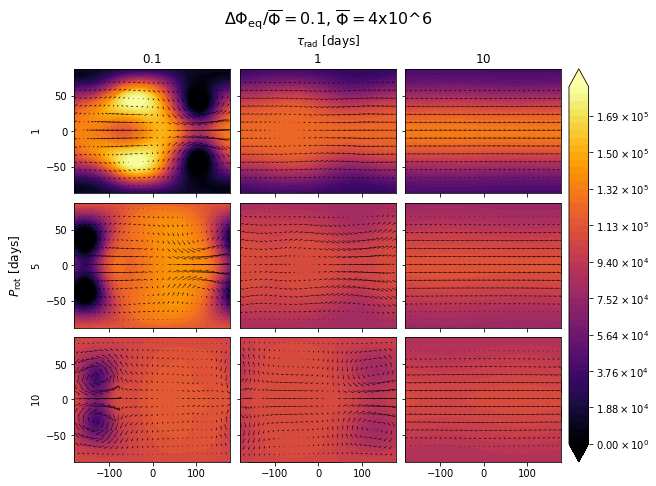

In [13]:
sample=read_pickle('high-Phibar4-P10-tau10-Phi')
[a,b]=np.shape(sample)

forcingarray=['high','medium','low']
phibararray=['1','2','3','4']
Pvec=[1,5,10]
tauvec=['0p1',1,10]

for k in range(3):
    for l in range(4):
        firstname=forcingarray[k]+'-Phibar'+phibararray[l]+'-P'
        
        Phidata=np.zeros((9,a,b))
        Udata=np.zeros((9,a,b))
        Vdata=np.zeros((9,a,b))


        for i in range(3):
            for j in range(3):
                Phifilename=firstname+str(Pvec[j])+'-tau'+str(tauvec[i])+'-Phi'
                Phidata[i+3*j,:,:]=read_pickle(Phifilename)

                Ufilename=firstname+str(Pvec[j])+'-tau'+str(tauvec[i])+'-U'
                Udata[i+3*j,:,:]=read_pickle(Ufilename)

                Vfilename=firstname+str(Pvec[j])+'-tau'+str(tauvec[i])+'-V'
                Vdata[i+3*j,:,:]=read_pickle(Vfilename)
        
        if forcingarray[k]=='high':
            forcingtitle='1'
        elif forcingarray[k]=='medium':
            forcingtitle='0.5'
        else:
            forcingtitle='0.1'
        title=r'$\Delta \Phi_{\rm eq}/\overline{\Phi}=$'+forcingtitle+', '+r'$\overline{\Phi}=$'+phibararray[l]+'x10^6'
        fig=makeplotgrid(Phidata,Udata,Vdata,title)
        filename=forcingarray[k]+'-Phibar'+phibararray[l]+'.pdf'
        fig.savefig(filename, dpi = 300,bbox_inches='tight')

(64, 128)
(64,)


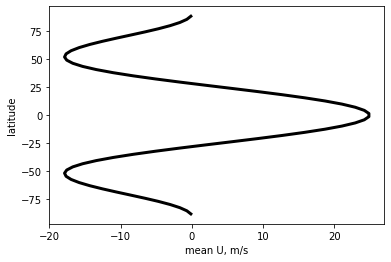

In [14]:
#make one zonal plot and format it nicely

def zonal_wind_plot(Udata,mus):
    
    """

    :param plotdata: first variable, JxM+1 

    
    """
    #t = np.linspace(0, dt*tmax/3600, tmax, endpoint=True)
    
    Ubar=np.mean(Udata,axis=1)
    print(np.shape(Ubar))
    Y = np.arcsin(mus)*180/np.pi #generate latitude
    
    fig=plt.plot(Ubar, Y,color='k',linewidth=3)
    
    plt.xlabel('mean U, m/s')
    plt.ticklabel_format(axis='both', style='sci')
    plt.ylabel('latitude')
    plt.ticklabel_format(axis='both', style='sci')
    
    plt.show()
    return fig
sampleU=read_pickle('high-Phibar4-P10-tau10-U')
print(np.shape(sampleU))

zonal_wind_plot(sampleU,mus)

In [15]:
#make zonal 3x3 subplots thingy

def makewindgrid(Udata,title):
    
    """
    Creates a 3x3 plot

    Parameters
    ----------
    
    :param U: 
         array of size 9xJxI
    
    :param title:
        string
    -------
    :return fig: the figure

    """
    color='k'
    linewidth=2

    axiscolor='gray'
    axisstyle='-'
    axiswidth=1
    opacity=0.5
    
    fig, axs=plt.subplots(3,3,sharex=True,sharey=True, constrained_layout=True, gridspec_kw=dict(width_ratios=[2, 2, 2]),figsize=(9,6))

    Uavg=np.mean(Udata,axis=2)
    axs[0,0].set_xlim(left=np.min(Uavg)*1.1, right=np.max(Uavg)*1.05)
    Y = np.arcsin(mus)*180/np.pi


    tauarray=['0p1','1','10']
    periodarray=['1','5','10']

    UP1tau0p1=Udata[0,:,:]
    UP1tau0p1bar=np.mean(UP1tau0p1,axis=1)
    axs[0,0].plot(UP1tau0p1bar, Y,color=color,linewidth=linewidth)
    axs[0,0].set_title(r'$\tau_{\rm rad}=0.1$')
    axs[0,0].set_ylabel(r'$P_{\rm rot}=1$')


    UP1tau1=Udata[1,:,:]
    UP1tau1bar=np.mean(UP1tau1,axis=1)
    axs[0,1].plot(UP1tau1bar, Y,color=color,linewidth=linewidth)
    axs[0,1].set_title(r'$\tau_{\rm rad}=1$')


    UP1tau10=Udata[2,:,:]
    UP1tau10bar=np.mean(UP1tau10,axis=1)
    axs[0,2].plot(UP1tau1bar, Y,color=color,linewidth=linewidth)
    axs[0,2].set_title(r'$\tau_{\rm rad}=10$')


    UP5tau0p1=Udata[3,:,:]
    UP5tau0p1bar=np.mean(UP5tau0p1,axis=1)
    axs[1,0].plot(UP5tau0p1bar, Y,color=color,linewidth=linewidth)
    axs[1,0].set_ylabel(r'$P_{\rm rot}=5$')


    UP5tau1=Udata[4,:,:]
    UP5tau1bar=np.mean(UP5tau1,axis=1)
    axs[1,1].plot(UP5tau1bar, Y,color=color,linewidth=linewidth)

    
    UP5tau10=Udata[5,:,:]
    UP5tau10bar=np.mean(UP5tau10,axis=1)
    axs[1,2].plot(UP5tau10bar, Y,color=color,linewidth=linewidth)

   
    UP10tau0p1=Udata[6,:,:]
    UP10tau0p1bar=np.mean(UP10tau0p1,axis=1)
    axs[2,0].plot(UP10tau0p1bar, Y,color=color,linewidth=linewidth)
    axs[2,0].set_ylabel(r'$P_{\rm rot}=10$')


    UP10tau1=Udata[7,:,:]
    UP10tau1bar=np.mean(UP10tau1,axis=1)
    axs[2,1].plot(UP10tau1bar, Y,color=color,linewidth=linewidth)

    
    UP10tau10=Udata[8,:,:]
    UP10tau10bar=np.mean(UP10tau10,axis=1)
    axs[2,2].plot(UP10tau10bar, Y,color=color,linewidth=linewidth)

    
    for i in range(3):
        for j in range(3):
            axs[i,j].axvline(x=0,color=axiscolor,linestyle=axisstyle,linewidth=axiswidth,alpha=opacity)
    
    fig.suptitle(title) 
    plt.show()
    return fig



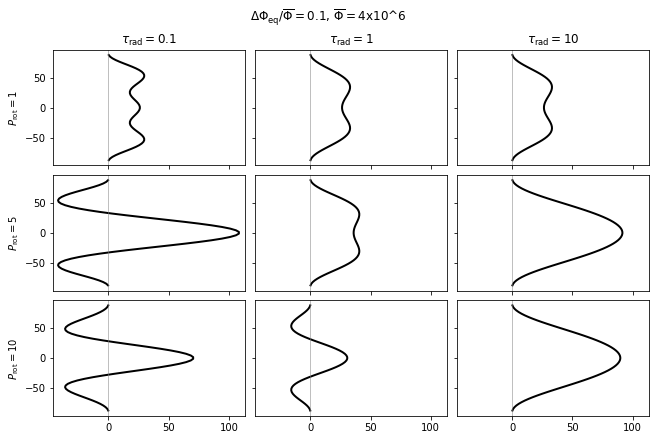

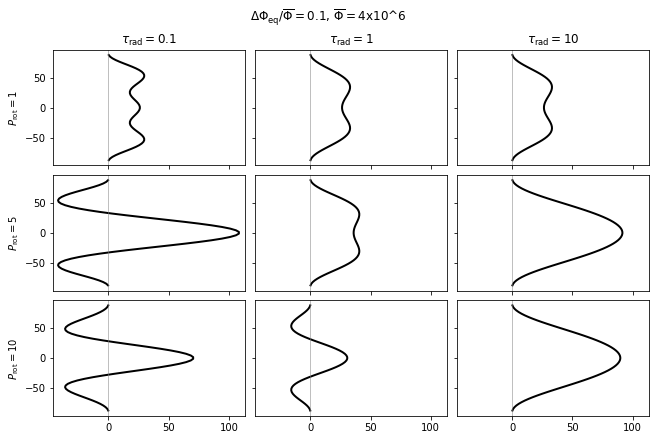

In [16]:
makewindgrid(Udata,title)

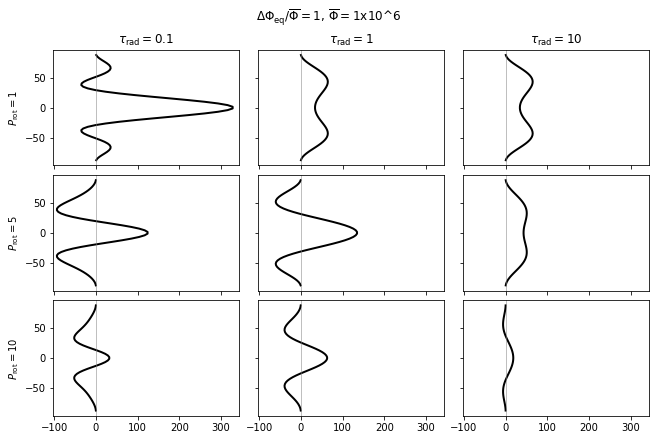

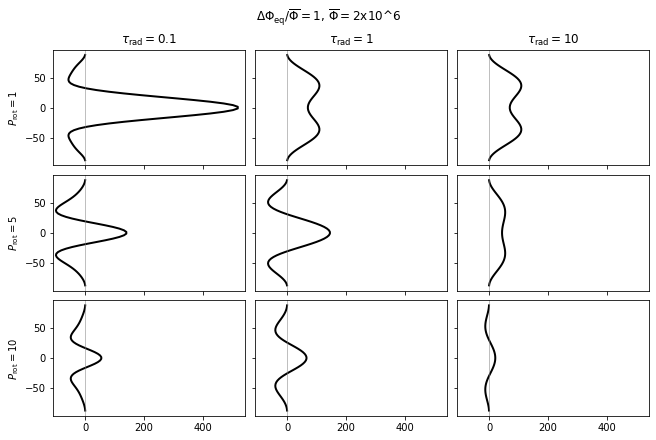

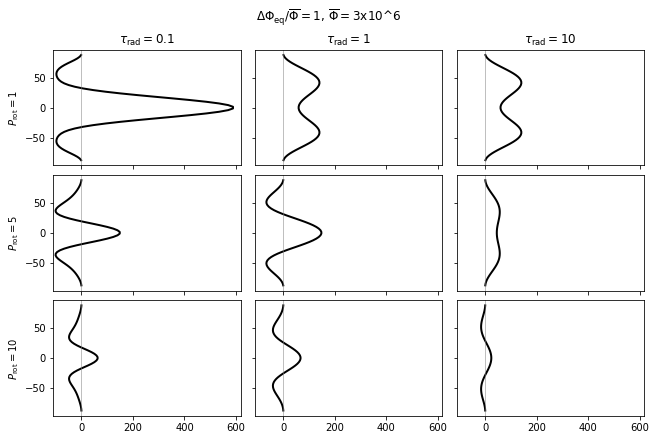

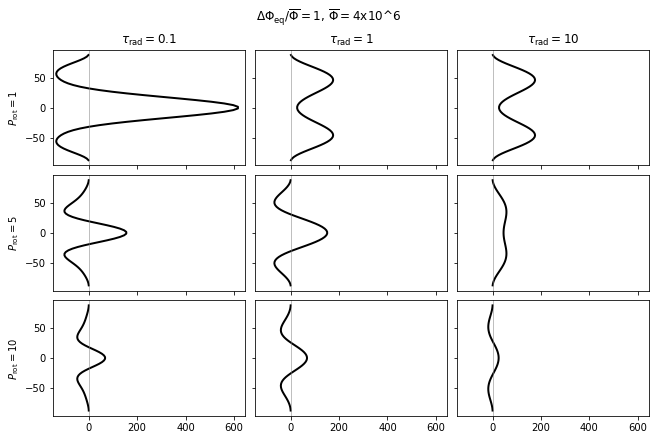

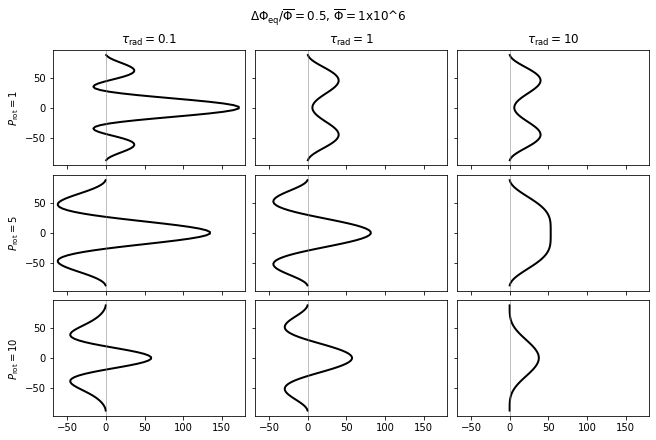

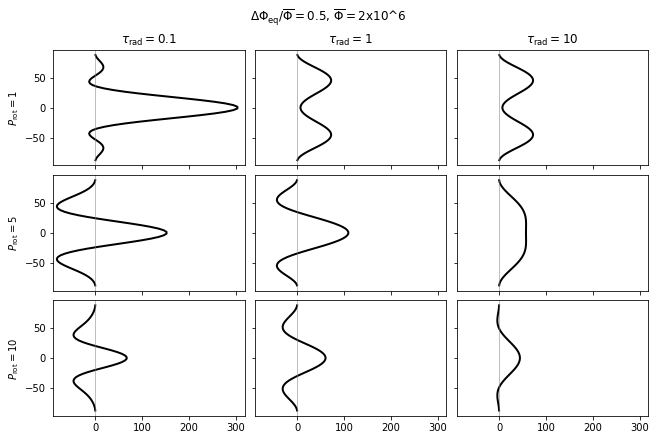

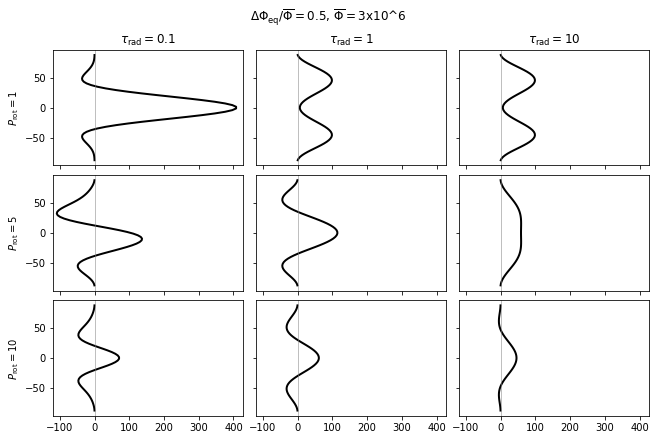

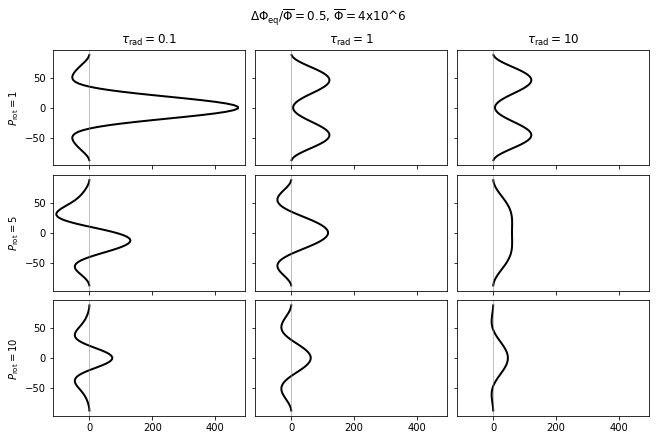

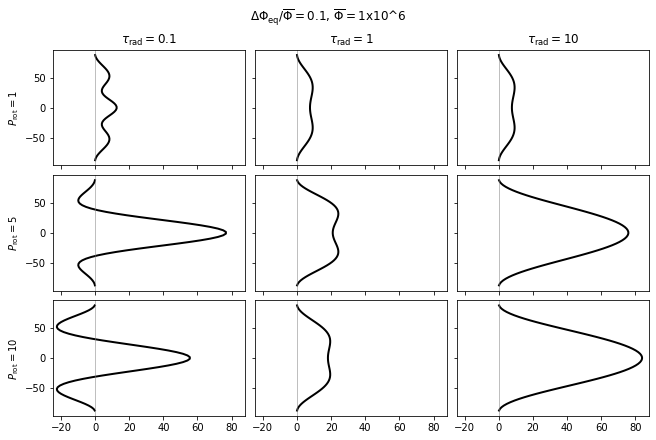

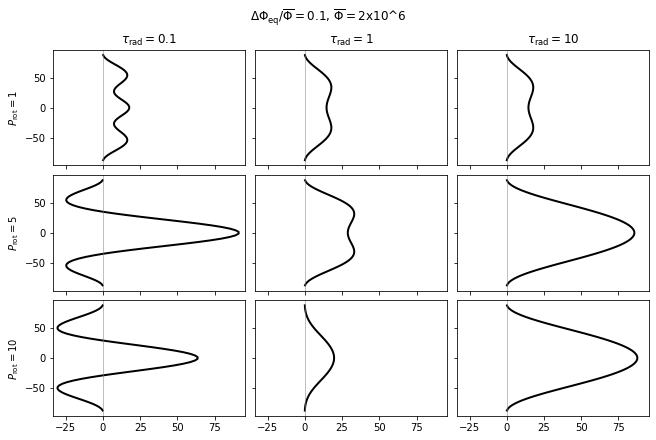

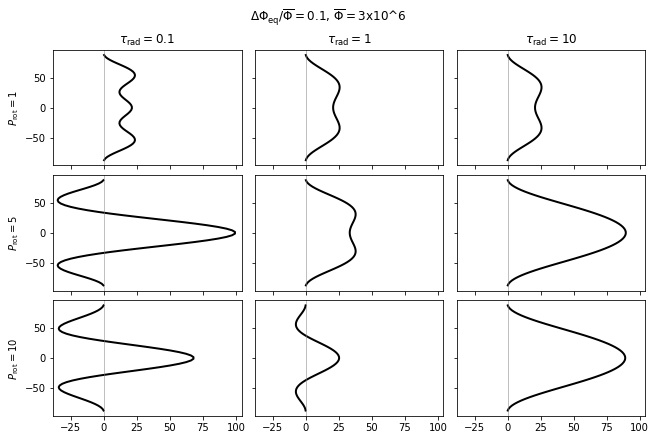

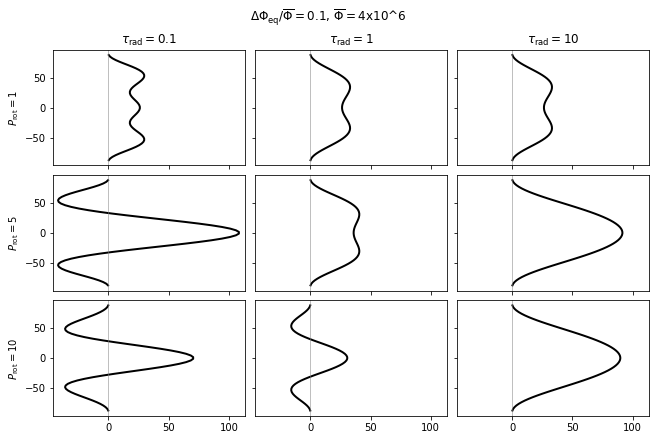

In [17]:
sample=read_pickle('high-Phibar4-P10-tau10-Phi')
[a,b]=np.shape(sample)

forcingarray=['high','medium','low']
phibararray=['1','2','3','4']
Pvec=[1,5,10]
tauvec=['0p1',1,10]

for k in range(3):
    for l in range(4):
        firstname=forcingarray[k]+'-Phibar'+phibararray[l]+'-P'
        
        Phidata=np.zeros((9,a,b))
        Udata=np.zeros((9,a,b))
        Vdata=np.zeros((9,a,b))


        for i in range(3):
            for j in range(3):


                Ufilename=firstname+str(Pvec[j])+'-tau'+str(tauvec[i])+'-U'
                Udata[i+3*j,:,:]=read_pickle(Ufilename)

        if forcingarray[k]=='high':
            forcingtitle='1'
        elif forcingarray[k]=='medium':
            forcingtitle='0.5'
        else:
            forcingtitle='0.1'
        title=r'$\Delta \Phi_{\rm eq}/\overline{\Phi}=$'+forcingtitle+', '+r'$\overline{\Phi}=$'+phibararray[l]+'x10^6'
        #title=forcingarray[k]+' forcing, Phibar='+phibararray[l]+'x10^6'
        fig=makewindgrid(Udata,title)
        filename=forcingarray[k]+'-Phibar'+phibararray[l]+'-wind.pdf'
        fig.savefig(filename, dpi = 300,bbox_inches='tight')

In [20]:
#load a sample spinup file
spinup_test=read_pickle_local('spinup_rms/high-Phibar4-P10-tau10-spinup')
print(np.shape(spinup_test))



(2880000, 2)


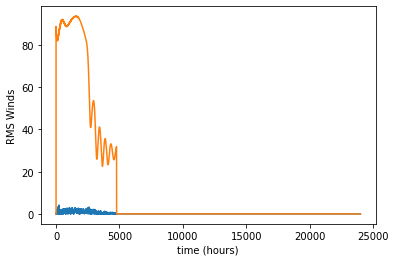

In [21]:

def spinup_plot(plotdata,tmax,dt):
    """

    :param plotdata: first variable, JxM+1 
    :type statevar1: float

    
    """
    t = np.linspace(0, dt*tmax/3600, tmax, endpoint=True)
    
    plt.plot(t, plotdata[:,0])
    plt.plot(t, plotdata[:,1])
    
    plt.xlabel('time (hours)')
    plt.ticklabel_format(axis='both', style='sci')
    plt.ylabel('RMS Winds')
    
    plt.ticklabel_format(axis='both', style='sci')
    
    plt.show()
    
spinup_plot(spinup_test,len(spinup_test),30)

## Planetary T_eq as a function of star type and rotation period

[1649.1440212   964.42527417  765.46484738]


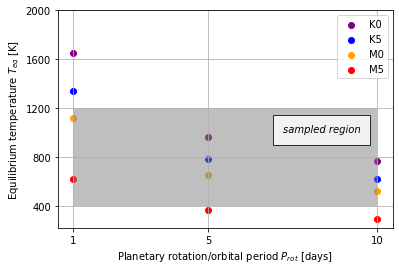

In [22]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 21 15:03:41 2022

@author: ek672
"""

import numpy as np
from astropy import constants as const
import matplotlib.pyplot as plt


#implement Teq temperature

def get_Teq(A,Sp):
    Teq4=((1-A)*Sp/4)/const.sigma_sb.value
    Teq=(Teq4)**0.25
    return Teq

TeqEarth=get_Teq(0.3,1361)
#print(TeqEarth)

def get_Sp(L,a):
    Sp=L/(4*np.pi*a**2)
    return Sp
    
SpEarth=get_Sp(const.L_sun.value,const.au.value)
#print(SpEarth)

#implement third law for every body

def get_rotation_period(a,M):
    
    psquared=((4*np.pi**2)/(const.G.value*M))*a**3
    p=np.sqrt(psquared)
    
    return p

def get_distance(p,M):
    
    acubed=(p**2)*(const.G.value*M)/(4*np.pi**2)
    a=acubed**(1/3)
    
    return a

#test for Earth
p=get_rotation_period(const.au.value, const.M_sun.value)
#print(p/(3600*24))

a=get_distance(31558196.02038122, const.M_sun.value)
#print(a/const.au.value)

def get_luminosity(Rstar,Tstar):
    L=4*np.pi*Rstar**2*const.sigma_sb.value*Tstar**4

def get_Teq_and_dist(startype,prot,albedo):
    
    if startype=='Sun': 
        Mstar=const.M_sun.value
        Lstar=const.L_sun.value   
    elif startype=='K0': 
        Mstar=0.78*const.M_sun.value
        Tstar=5240
        Rstar=0.85*const.R_sun.value
        Lstar=0.40*const.L_sun.value    
    elif startype=='K5': 
        Mstar=0.69*const.M_sun.value
        Tstar=4410
        Rstar=0.74*const.R_sun.value
        Lstar=0.16*const.L_sun.value
    elif startype=='M0':
        Mstar=0.60*const.M_sun.value
        Tstar=3800
        Rstar=0.51*const.R_sun.value
        Lstar=0.072*const.L_sun.value
    elif startype=='M5': 
        Mstar=0.15*const.M_sun.value
        Tstar=3120
        Rstar=0.18*const.R_sun.value
        Lstar=0.0027*const.L_sun.value
    else:
        print('Unsupported star type.')
        
        #get distance
    a=get_distance(prot,Mstar)
    #print('distance is '+str(a/const.au.value))
    Sp=get_Sp(Lstar,a)
    Teq=get_Teq(albedo,Sp)
    
    distance=a/const.au.value
    # print('distance is '+str(a/const.au.value)+' AU')
    # print('temperature is '+str(Teq))
    
    return Teq, distance

prot=10

typelist=['K0','K5', 'M0', 'M5']
protlist=[24*3600, 5*24*3600, 10*24*3600]
Teqlist=np.zeros((len(typelist),len(protlist)))
distlist=np.zeros((len(typelist),len(protlist)))

for i in range(len(typelist)):
    for j in range(len(protlist)):
        Teq,distance=get_Teq_and_dist(typelist[i], protlist[j], 0)
        Teqlist[i,j]=Teq
        distlist[i,j]=distance
        
print(Teqlist[0,:])

protlisth=[1, 5, 10]

plt.scatter(protlisth,Teqlist[0],c='purple')
plt.scatter(protlisth,Teqlist[1],c='blue')
plt.scatter(protlisth,Teqlist[2],c='orange')
plt.scatter(protlisth,Teqlist[3],c='red')
plt.xlabel(r'Planetary rotation/orbital period $P_{rot}}$ [days]')
plt.ylabel(r"Equilibrium temperature $T_{eq}$ [K]")
plt.grid(visible=True, which='major', axis='both')
plt.fill_between(protlisth,400, 1200, facecolor='gray', interpolate=True, alpha=0.5)
plt.text(7.2, 1000, 'sampled region', style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
#ax.set_yticks([0.2, 0.6, 0.8], minor=False)
plt.xticks([1, 5, 10])
plt.yticks([400, 800, 1200, 1600, 2000])
plt.legend(typelist)
plt.savefig('t_eq.pdf', dpi = 300,bbox_inches='tight')
plt.show()

## Compute Phibar

In [23]:
#import params as p
import astropy.constants as const
import numpy as np

flux1=468000
flux2=7.37*10**4
flux3=1.16*10**4

#DPhiEq1=3700*(flux1/(4*5.7*10**(-8)))**0.25/p.Phibar
#DPhiEq2=3700*(flux2/(4*5.7*10**(-8)))**0.25/p.Phibar
#DPhiEq3=3700*(flux3/(4*5.7*10**(-8)))**0.25/p.Phibar



g=21.1
p=100*250#*g/10 #(in Pa)
Cp=13000

sigmaSB=5.7*10**(-8)

#equilibrium temp
TeH=1198
TeW=755

def find_tau_rad(p,Cp,g,sigmaSB,Te):
    
    taurad=((p*Cp)/(4*g*sigmaSB*(Te**3)))/(3600*24)
    
    return taurad

tauradH=find_tau_rad(p, Cp, g, sigmaSB, TeH)
tauradW=find_tau_rad(p, Cp, g, sigmaSB, TeW)


def find_Phibar(molmass,T):
    """
    

    Parameters
    ----------
    molmass : float
        DESCRIPTION.
    T : float
        Temperature, K.

    Returns
    -------
    Phibar : TYPE
        DESCRIPTION.

    """
    
    Phibar=const.k_B.value*T/molmass
    
    return Phibar

mu_range=[2.3,2.5,3.2,4.0,5.5]
Trange=[400,800,1200]

for i in range(len(mu_range)):
    for j in range(len(Trange)):
        
        Phibar=find_Phibar(mu_range[i]*(1.6735*10**(-27)), Trange[j])
        print(int(Phibar))

1434794
2869589
4304383
1320010
2640021
3960032
1031258
2062517
3093775
825006
1650013
2475020
600004
1200009
1800014


## spin-up plot

In [ ]:
timestamps=[3000,3150,3300,3450,5000,5150]


        
        Phidata=np.zeros((9,a,b))
        Udata=np.zeros((9,a,b))
        Vdata=np.zeros((9,a,b))


        for i in range(3):
            for j in range(3):
                Phifilename=firstname+str(Pvec[j])+'-tau'+str(tauvec[i])+'-Phi'
                Phidata[i+3*j,:,:]=read_pickle(Phifilename)

                Ufilename=firstname+str(Pvec[j])+'-tau'+str(tauvec[i])+'-U'
                Udata[i+3*j,:,:]=read_pickle(Ufilename)

                Vfilename=firstname+str(Pvec[j])+'-tau'+str(tauvec[i])+'-V'
                Vdata[i+3*j,:,:]=read_pickle(Vfilename)
        
        if forcingarray[k]=='high':
            forcingtitle='1'
        elif forcingarray[k]=='medium':
            forcingtitle='0.5'
        else:
            forcingtitle='0.1'
        title=r'$\Delta \Phi_{\rm eq}/\overline{\Phi}=$'+forcingtitle+', '+r'$\overline{\Phi}=$'+phibararray[l]+'x10^6'
        fig=makeplotgrid(Phidata,Udata,Vdata,title)
        filename=forcingarray[k]+'-Phibar'+phibararray[l]+'.pdf'
        fig.savefig(filename, dpi = 300,bbox_inches='tight')